In [274]:
import numpy as np
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Q1

In [275]:
gold = pd.read_csv('gold.txt', sep='\t', header=None, names=['url', 'category'])
labels = pd.read_csv('labels.txt', sep=r'\s+', header=None, names=['turk','url', 'category'])
print(gold[:5])
print(labels[:5])

                                      url category
0               http://0800-horoscope.com        G
1                      http://18games.net        X
2                    http://1pixelout.net        G
3  http://1porno.com/004/teens/index.html        X
4   http://1stpussy.com/005/16/index.html        X
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


### Q2

In [276]:
labels_on_gold = labels.merge(gold, left_on='url',right_on='url', how='inner', suffixes=['_labels', '_gold'])
print(labels_on_gold)

df2 = labels.merge(gold[['url']], left_on='url',right_on='url', how='left', indicator=True)
labels_unknown = df2[df2['_merge'] == 'left_only'].drop('_merge', axis=1)
print(labels_unknown)

                turk                        url category_labels category_gold
0     A1253FXHCZ9CWM  http://0800-horoscope.com               G             G
1     A153PKAL7OAY36  http://0800-horoscope.com               G             G
2     A1FV9SAPL5C6KY  http://0800-horoscope.com               G             G
3     A1JTOT0DWM6QGL  http://0800-horoscope.com               G             G
4     A1PXXEOGQ76RNJ  http://0800-horoscope.com               G             G
...              ...                        ...             ...           ...
3319  A35CBDDGBM7T6E       http://yousendit.com               G             G
3320  A3J86MK3VIE6ST       http://yousendit.com               G             G
3321   A4GP97LAQCCHJ       http://yousendit.com               G             G
3322   AAQNUEUU7H1Y5       http://yousendit.com               G             G
3323   ANC9EWZTGN5HK       http://yousendit.com               G             G

[3324 rows x 4 columns]
                 turk               url

### Q3

In [277]:
def percent_correct(df):
    return df['correct'].sum() / df['correct'].count()

number_of_ratings = labels_on_gold.groupby('turk').count()['url']
labels_on_gold['correct'] = labels_on_gold['category_labels'] == labels_on_gold['category_gold']
labels_on_gold['correct'] = labels_on_gold['correct'] * 1 
rater_goodness = pd.DataFrame(labels_on_gold.groupby('turk').apply(percent_correct), columns=['Rating'])
rater_goodness['Count'] = number_of_ratings
rater_goodness

,Rating,Count
turk,,
A112DVP1KG4QZU,1.000000,1
A1253FXHCZ9CWM,0.517241,29
A12CY1Q7XKJJDE,1.000000,1
A12RE8G66WTO8B,0.750000,20
A12Y1GTGIQDGRA,0.333333,3
...,...,...
AYWOBMTEGFVVI,0.000000,1
AZ1S5BIG5R6P6,0.714286,35
AZSDW7JJL5VA7,0.680000,100


### Q4

In [278]:
def odds_ratio(p):
    return p / (1.001 - p)

rater_goodness['odds'] = rater_goodness['Rating'].map(odds_ratio)
rater_goodness

,Rating,Count,odds
turk,,,
A112DVP1KG4QZU,1.000000,1,1000.000000
A1253FXHCZ9CWM,0.517241,29,1.069214
A12CY1Q7XKJJDE,1.000000,1,1000.000000
A12RE8G66WTO8B,0.750000,20,2.988048
A12Y1GTGIQDGRA,0.333333,3,0.499251
...,...,...,...
AYWOBMTEGFVVI,0.000000,1,0.000000
AZ1S5BIG5R6P6,0.714286,35,2.491281
AZSDW7JJL5VA7,0.680000,100,2.118380


### Q5

In [279]:
rater_goodness[rater_goodness['Count'] >= 20].sort_values(by='Rating', ascending=False)[:10]

,Rating,Count,odds
turk,,,
A2U0R4X38GUKZE,0.950000,20,18.627451
A22C0PJUBFJTI0,0.916667,36,10.869565
A23YQUBXZPKILZ,0.875000,24,6.944444
ATVALOQVDCMZW,0.854369,103,5.826657
A1HIXWH4OXT8S4,0.825000,40,4.687500
A3220HG1O83HQ4,0.818182,22,4.475385
A32W20KGQXS0LL,0.800000,25,3.980100
A20PWAB7G3HDHU,0.800000,20,3.980100
AJSJVK40F5HM6,0.785714,28,3.649635


### Q6

Text(0.5, 1.0, 'Number of Ratings (Count) vs. Accuracy for each Turk')

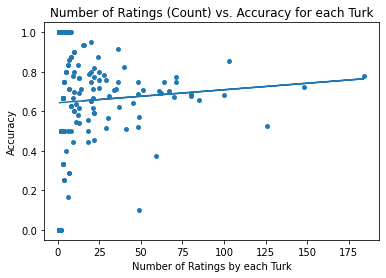

In [280]:
x = rater_goodness['Count']
y = rater_goodness['Rating']
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y, marker='o', s=15)
plt.plot(x, a*x+b) 

xlabel('Number of Ratings by each Turk')
ylabel('Accuracy')
title("Number of Ratings (Count) vs. Accuracy for each Turk")

Based on the scatterplot and the line of best fit, the number of ratings is very loosely related to the accuracy. There are a lot of data points for those turks with very few ratings, and as expected, their accuracy is either very high or very low. There are a decent amount of data points for those with a moderate count of ratings, and a few data points for those with a very high count of ratings. Looking at these, overall, there is a very slight upwards trend for accuracy as the number of ratings go up. With more data, the trend could be stronger or more apparent, and then there would be sufficient evidence to determine that ratings and accuracy are related. However, I would say there is not strong enough of a trend or strong enough of a signal to indicate that the number of ratings is directly related to accuracy.

### Q7

In [297]:
topturks = rater_goodness[rater_goodness['Count'] >= labels_on_gold['turk'].value_counts().quantile(.75)]
df4 = labels_unknown[labels_unknown['turk'].isin(topturks.index.values)]
df5 = df4.merge(rater_goodness, left_on='turk',right_on='turk', how='inner')
overall_odds = df5.groupby(['url', 'category'])[['odds']].agg('prod')
overall_odds

odds
url                         category           
http://0-101.net            G          2.155963
http://000.cc               G          1.460583
http://0000.jp              G         14.488244
http://000relationships.com G          9.914590
                            P          1.851852
...                                         ...
http://zynga.com            G          3.704611
http://zz868.com            G          1.047852
                            P          1.851852
http://zzx.cc               G          1.330229
                            X          1.620746

[14114 rows x 1 columns]

### Q8

In [282]:
def getrating(tuple):
    return tuple[1]

topcategory = pd.DataFrame(overall_odds.unstack().idxmax(axis=1), columns=['bestrating'])['bestrating'].apply(getrating)
result_75 = pd.DataFrame({'Top category':topcategory, 'Top odds':overall_odds.unstack().max(axis=1)})
result_75

,Top category,Top odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,9.914590
http://000vitamins.com,G,3.784982
...,...,...
http://zwinky.com,G,16.141443
http://zylom.com,G,1.735526
http://zynga.com,G,3.704611


### Q9

In [299]:
topturks2 = rater_goodness[rater_goodness['Count'] > labels_on_gold['turk'].value_counts().quantile(.25)]
df6 = labels_unknown[labels_unknown['turk'].isin(topturks2.index.values)]
df7 = df6.merge(rater_goodness, left_on='turk',right_on='turk', how='inner')
overall_odds2 = df7.groupby(['url', 'category'])[['odds']].agg('prod')

def getrating(tuple):
    return tuple[1]

topcategory = pd.DataFrame(overall_odds2.unstack().idxmax(axis=1), columns=['bestrating'])['bestrating'].apply(getrating)
result_25 = pd.DataFrame({'Top category 25':topcategory, 'Top odds':overall_odds2.unstack().max(axis=1)})

crosstab = pd.crosstab(index=result_75['Top category'], columns=result_25['Top category 25'])
normalized_crosstab = pd.crosstab(index=result_75['Top category'], columns=result_25['Top category 25'], normalize="index")

print(crosstab)
print("\n")
print(normalized_crosstab)

Top category 25     G    P    R    X
Top category                        
G                8329  563  175  202
P                 180  334   53   15
R                  21   36  130   26
X                  34    9   29  474


Top category 25         G         P         R         X
Top category                                           
G                0.898587  0.060740  0.018880  0.021793
P                0.309278  0.573883  0.091065  0.025773
R                0.098592  0.169014  0.610329  0.122066
X                0.062271  0.016484  0.053114  0.868132


The most errors are in Category G. However, if you look at the normalized crosstab, the highest percent of misclassified labels are Category P.